In [2]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Wrangle Data

In [3]:
# Load features and target datasets

df_features = pd.read_csv('train_features.csv', index_col=0)
df_targets = pd.read_csv('train_targets_scored.csv', index_col=0)

# Print the shapes
df_features.shape, df_targets.shape

((23814, 875), (23814, 206))

In [5]:
# Take a look at the df_features
df_features.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


**Takeaways**
- Drop the categorical variables. (A common misake new data scientists make is to apply PCA to non-continous variables.)
- Scale the continuous variables by StandardScaler

In [6]:
# Drop the categoricals
df_features.drop(columns=['cp_type', 'cp_time', 'cp_dose'], inplace=True)
df_features.shape # 872 features left

(23814, 872)

In [7]:
# Scale the features so each feature has unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Print the data type of X_scaled
type(X_scaled) # the scaler returns a np.array

numpy.ndarray

In [9]:
# Length of the array should match the number of observations
len(X_scaled) # 23814, matched

23814

In [10]:
# The length of every member in the array shoulb math the number of the features
len(X_scaled[0]) # 872, matched

872

In [49]:
# Check the mean of the scaled dataset
X_scaled.mean(axis=0) # checked: the scaled data have a mean of ~0

array([-8.95115565e-18,  2.02892861e-17,  2.83453262e-17, -6.86255267e-18,
       -4.77394968e-18,  3.58046226e-18, -7.16092452e-18, -5.66906525e-18,
        1.43218490e-17,  2.98371855e-19, -5.96743710e-18,  5.96743710e-18,
       -3.28209041e-18,  7.16092452e-18,  2.74502107e-17,  1.07413868e-17,
       -1.79023113e-18, -1.31283616e-17, -6.56418081e-18,  2.50632358e-17,
        1.79023113e-17, -1.25316179e-17, -6.86255267e-18,  7.16092452e-18,
       -1.49185928e-18, -4.17720597e-18,  1.49185928e-18,  2.32730047e-17,
        9.54789936e-18, -5.96743710e-19,  2.98371855e-18,  4.35622908e-17,
       -1.19348742e-17, -7.75766823e-18,  1.67088239e-17,  6.26580896e-18,
        2.68534670e-18, -2.02892861e-17, -1.25316179e-17, -1.31283616e-17,
        1.90957987e-17, -5.96743710e-18, -1.43218490e-17, -4.17720597e-18,
        2.08860299e-18, -8.05604009e-18, -1.07413868e-17,  2.98371855e-18,
        8.95115565e-18, -4.47557783e-18,  2.02892861e-17, -3.87883412e-18,
        3.28209041e-18,  

In [11]:
# Checkt the variance of the scaled dataset
X_scaled.var(axis=0) # Checked: should be 1 from begining to the end

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Principal Component Analysis

In [14]:
# Create a PCA object
pca = PCA(n_components=10)
pca

PCA(n_components=10)

In [15]:
# Fit the scaled data
pca = pca.fit(X_scaled)
pca

PCA(n_components=10)

In [16]:
# Transform the scaled data
X_pca = pca.transform(X_scaled)

# Check the shape of X_pca
X_pca.shape

(23814, 10)

In [17]:
# Measure the variance ratio of the principal components
ex_var = np.var(X_pca, axis=0)
ex_var_ratio = ex_var / np.sum(ex_var)
ex_var_ratio

array([0.58879457, 0.08198712, 0.06588149, 0.05961711, 0.04347553,
       0.04250805, 0.03543913, 0.03372977, 0.02577806, 0.02278918])

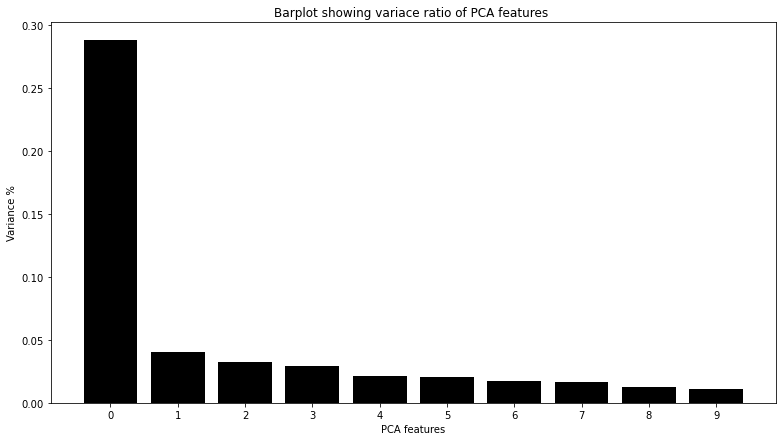

In [60]:
pca_features = range(pca.n_components_)

plt.figure(figsize=(13,7))
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(pca_features)
plt.title('Barplot showing variace ratio of PCA features ')

plt.bar(pca_features, pca.explained_variance_ratio_, color='black')

plt.show()

### Data Visualization by PCA

In [20]:
# Convert the X_pca to dataframe
df_pca = pd.DataFrame(X_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207796,-2.881921,2.211978,3.728993,-2.243541,-1.575074
1,-6.362689,3.711719,7.181210,-4.382650,3.710627,3.305081,1.691341,0.008072,0.146683,1.234925
2,-1.732367,2.389964,-3.211008,-5.197653,0.389110,-1.007892,1.544594,-2.844608,0.261896,-3.742566
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972125,-6.353004,1.786391,-6.916353,-0.725255,4.026931
4,-6.472501,1.016573,4.138738,-8.496884,-3.038392,-2.307637,-0.922353,0.420203,6.737722,4.574696
...,...,...,...,...,...,...,...,...,...,...
23809,-5.213466,2.287643,-2.027770,-2.810259,0.193224,-0.095629,0.878954,-0.767236,-2.589308,-1.308977
23810,-4.162142,-0.611263,-1.944464,1.573128,-3.049789,2.006922,-1.270098,-1.469455,1.185795,0.021339
23811,-6.319414,-1.133699,-0.133855,0.454233,0.445666,-1.460452,2.518916,0.523619,0.965540,-0.273536
23812,0.543592,-16.571763,5.914448,7.978579,6.316952,-3.128337,2.904446,6.197446,-7.047962,6.519169


In [31]:
# Take the target from the matrix
c_inhibitor = df_targets.loc[:, 'cyclooxygenase_inhibitor']
c_inhibitor.sum()

435

In [28]:
# Concat the target columns
df_pca['target'] = c_inhibitor.values
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,target
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207796,-2.881921,2.211978,3.728993,-2.243541,-1.575074,0
1,-6.362689,3.711719,7.181210,-4.382650,3.710627,3.305081,1.691341,0.008072,0.146683,1.234925,0
2,-1.732367,2.389964,-3.211008,-5.197653,0.389110,-1.007892,1.544594,-2.844608,0.261896,-3.742566,0
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972125,-6.353004,1.786391,-6.916353,-0.725255,4.026931,0
4,-6.472501,1.016573,4.138738,-8.496884,-3.038392,-2.307637,-0.922353,0.420203,6.737722,4.574696,0


In [32]:
# Check the count of the target
df_pca.target.sum() # matched, 435

435

In [42]:
# Map the target values to names
df_pca.target = df_pca.target.map({0: 'negative', 1:'positive'})
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,target
0,-7.107215,-1.165196,-0.308750,7.710262,-4.207796,-2.881921,2.211978,3.728993,-2.243541,-1.575074,negative
1,-6.362689,3.711719,7.181210,-4.382650,3.710627,3.305081,1.691341,0.008072,0.146683,1.234925,negative
2,-1.732367,2.389964,-3.211008,-5.197653,0.389110,-1.007892,1.544594,-2.844608,0.261896,-3.742566,negative
3,9.183280,-2.753483,-5.091478,-8.611177,-4.972125,-6.353004,1.786391,-6.916353,-0.725255,4.026931,negative
4,-6.472501,1.016573,4.138738,-8.496884,-3.038392,-2.307637,-0.922353,0.420203,6.737722,4.574696,negative


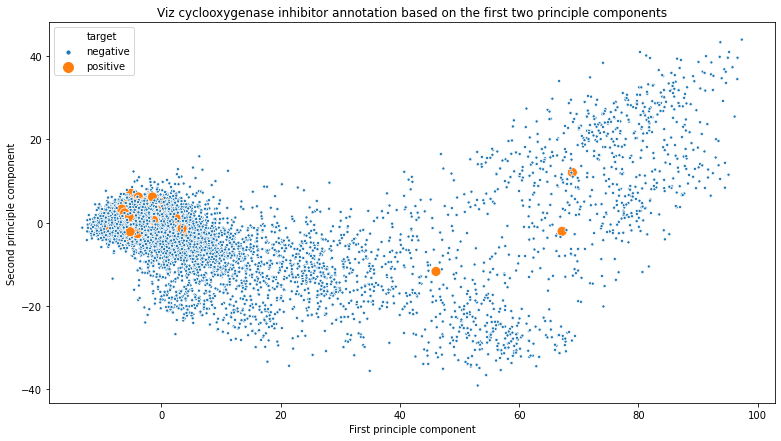

In [59]:
# Viz

plt.figure(figsize=(13,7))
sns.scatterplot(data=df_pca, x=0, y=1, hue='target', size='target', sizes=(100, 10))
plt.title('Viz cyclooxygenase inhibitor annotation based on the first two principle components')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()
plt.show()

 **Results&Conclusion**
- The variance drops after the first component.
- The data is really imbalanced.
- The positive and negative labels are not seperated very well with the first 2 principle components are new features.
- The positive labels are buried in the negative labels.
- Despite of the classes, the observations seems to form 3~4 clusters, wich is worth of further exploring. 